In [49]:
from __future__ import absolute_import, division, print_function

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
fashion_minist_dataset = keras.datasets.fashion_mnist

In [53]:
(train_images, train_labels), (test_images, test_labels) = fashion_minist_dataset.load_data()

In [54]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [55]:
# check the train labels
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [56]:
# checks the test labels 
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]


In [58]:
#explore the length of training and testing sets and see if the number of images equals to number of labels
print(len(test_images),len(test_labels), len(train_labels), len(train_images))

10000 10000 60000 60000


In [59]:
#set class names that corresponds to each label in the training and testing sets
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [60]:
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


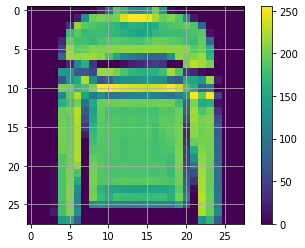

In [61]:
# inspect any image by checking the range of the intesity of the color

plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid()
plt.show()

In [62]:
# First lets change the scale of the images. Simplye divide the images by the scale (255) so that our images scale between 0 and 1
train_images = train_images / 255
test_images = test_images / 255

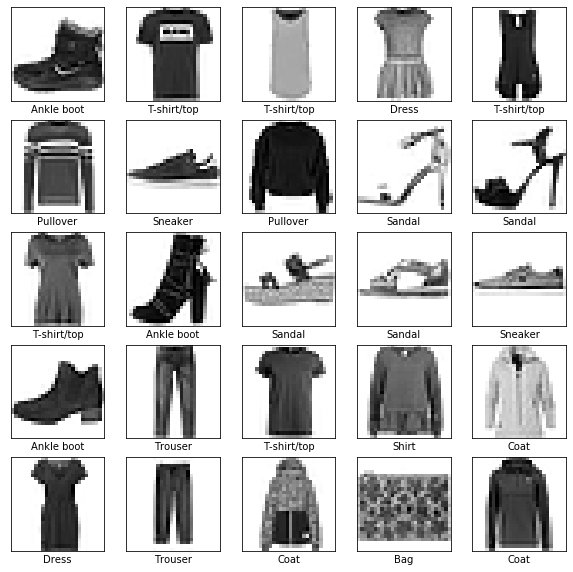

In [63]:
# lets have a look at a few images in the training sets
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show
    

<function matplotlib.pyplot.show(*args, **kw)>

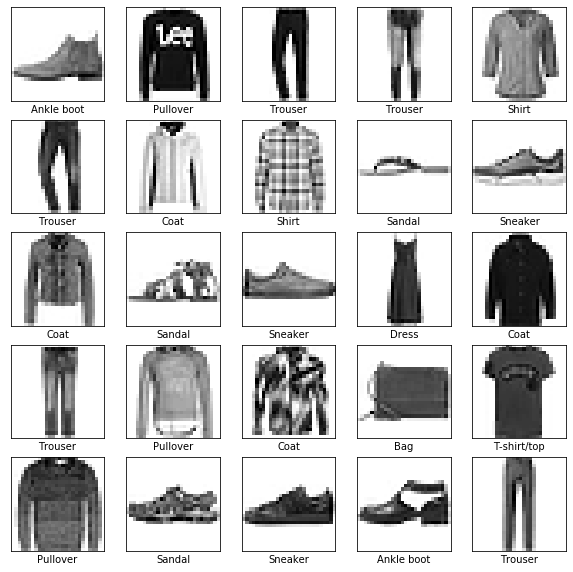

In [37]:
# Good idea to also look at the testing set plt.figure(figsize=(10,10))
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show

In [66]:
# lets now setup the model and the necessary parameters 
model_fashion = keras.Sequential([
        #transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels
        keras.layers.Flatten(input_shape =(28,28)),        
        keras.layers.Dense(128, activation= tf.nn.relu),
        #returns an array of 10 probability scores that sum to 1
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [67]:
model_fashion.compile(
    #optimize the model it learns from the data provided
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
                     )

In [68]:
model_fashion.fit(train_images,train_labels, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4960 - acc: 0.8248
Epoch 2/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3753 - acc: 0.8644
Epoch 3/15
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3369 - acc: 0.8774
Epoch 4/15
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3096 - acc: 0.8870
Epoch 5/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2939 - acc: 0.8907
Epoch 6/15
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2779 - acc: 0.8967
Epoch 7/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2670 - acc: 0.8996
Epoch 8/15
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2540 - acc: 0.9052
Epoch 9/15
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2468 - acc: 0.9072
Epoch 10/15
60000/60000 [==============================] - 6s 98us/sample - lo

In [69]:
#evaluate the model on the testing sets
test_loss, test_acc  = model_fashion.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3402 - acc: 0.8866


In [70]:
# lets make a prediction for the testing set images
predictor = model_fashion.predict(test_images)

In [71]:
predictor[0]

array([4.3002094e-10, 3.4382996e-11, 1.2479046e-10, 4.9218004e-12,
       2.4908503e-10, 3.0502611e-05, 2.2452378e-09, 6.6249946e-04,
       4.2718239e-11, 9.9930704e-01], dtype=float32)

In [72]:
np.argmax(predictor[0])

9

In [73]:
class_names[9], test_labels[0]

('Ankle boot', 9)

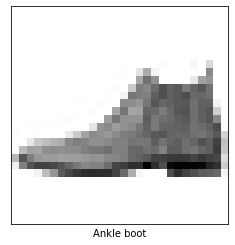

In [74]:
# we can show the image by the index
plt.figure()
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(class_names[test_labels[0]])
plt.show()